# Probability and Information Theory

## Steps

1. Understand the problem and the mathematical model and generate data
2. Load the (generated) data and get an overview
3. Try to fit parametric probability distributions
4. Joint  and conditional probabilities, chain rule and Bayes' Theorem
5. Self-entropy of an event and entropy of a distribution

## Understand the problem and the mathematical model and generate data

From [1] we learned the following simplified model for simulating and understanding the spreading of diseases. 

![Epidemic process](img/epidemic_process.png)

A fraction of $\beta$ of the susceptible indivisuals $S$ gets infected each unit of time, say each day. A fraction $\mu$ of the infected recover. A simple generalization is a third parameter $\nu$ and the assumption that only $\nu\mu$ individuals recover, while ${1-\nu}\mu$ individuals die.

This leads to the following system of ordinary differencial equations (ODEs):

\begin{align}
\frac{\delta S}{\delta t} & = -\beta S(t)I(t)\\
\frac{\delta I}{\delta t} & = \beta S(t)I(t) -\mu I(t)\\
\frac{\delta R}{\delta t} & = \nu\mu I(t)\\
\frac{\delta D}{\delta t} & = (1-\nu)\mu I(t)
\end{align}

Given starting values of $S(0)=99, I(0)=1, R(0)=D(0)=0$ and parameter values for $\beta=0.05\%, \mu=1.75\%, \nu=99\%$, we can simulate this system of ODEs.

In `Matlab`, we use the ordinary differencial equation solver `ode45`.

In [152]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import rcParams
from typing import *

rcParams["figure.facecolor"] = "white"

In [190]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2422, 0.1504, 0.6603],
[0.2444, 0.1534, 0.6728],
[0.2464, 0.1569, 0.6847],
[0.2484, 0.1607, 0.6961],
[0.2503, 0.1648, 0.7071],
[0.2522, 0.1689, 0.7179],
[0.254, 0.1732, 0.7286],
[0.2558, 0.1773, 0.7393],
[0.2576, 0.1814, 0.7501],
[0.2594, 0.1854, 0.761],
[0.2611, 0.1893, 0.7719],
[0.2628, 0.1932, 0.7828],
[0.2645, 0.1972, 0.7937],
[0.2661, 0.2011, 0.8043],
[0.2676, 0.2052, 0.8148],
[0.2691, 0.2094, 0.8249],
[0.2704, 0.2138, 0.8346],
[0.2717, 0.2184, 0.8439],
[0.2729, 0.2231, 0.8528],
[0.274, 0.228, 0.8612],
[0.2749, 0.233, 0.8692],
[0.2758, 0.2382, 0.8767],
[0.2766, 0.2435, 0.884],
[0.2774, 0.2489, 0.8908],
[0.2781, 0.2543, 0.8973],
[0.2788, 0.2598, 0.9035],
[0.2794, 0.2653, 0.9094],
[0.2798, 0.2708, 0.915],
[0.2802, 0.2764, 0.9204],
[0.2806, 0.2819, 0.9255],
[0.2809, 0.2875, 0.9305],
[0.2811, 0.293, 0.9352],
[0.2813, 0.2985, 0.9397],
[0.2814, 0.304, 0.9441],
[0.2814, 0.3095, 0.9483],
[0.2813, 0.315, 0.9524],
[0.2811, 0.3204, 0.9563],
[0.2809, 0.3259, 0.96],
[0.2807, 0.3313, 0.9636],
[0.2803, 0.3367, 0.967],
[0.2798, 0.3421, 0.9702],
[0.2791, 0.3475, 0.9733],
[0.2784, 0.3529, 0.9763],
[0.2776, 0.3583, 0.9791],
[0.2766, 0.3638, 0.9817],
[0.2754, 0.3693, 0.984],
[0.2741, 0.3748, 0.9862],
[0.2726, 0.3804, 0.9881],
[0.271, 0.386, 0.9898],
[0.2691, 0.3916, 0.9912],
[0.267, 0.3973, 0.9924],
[0.2647, 0.403, 0.9935],
[0.2621, 0.4088, 0.9946],
[0.2591, 0.4145, 0.9955],
[0.2556, 0.4203, 0.9965],
[0.2517, 0.4261, 0.9974],
[0.2473, 0.4319, 0.9983],
[0.2424, 0.4378, 0.9991],
[0.2369, 0.4437, 0.9996],
[0.2311, 0.4497, 0.9995],
[0.225, 0.4559, 0.9985],
[0.2189, 0.462, 0.9968],
[0.2128, 0.4682, 0.9948],
[0.2066, 0.4743, 0.9926],
[0.2006, 0.4803, 0.9906],
[0.195, 0.4861, 0.9887],
[0.1903, 0.4919, 0.9867],
[0.1869, 0.4975, 0.9844],
[0.1847, 0.503, 0.9819],
[0.1831, 0.5084, 0.9793],
[0.1818, 0.5138, 0.9766],
[0.1806, 0.5191, 0.9738],
[0.1795, 0.5244, 0.9709],
[0.1785, 0.5296, 0.9677],
[0.1778, 0.5349, 0.9641],
[0.1773, 0.5401, 0.9602],
[0.1768, 0.5452, 0.956],
[0.1764, 0.5504, 0.9516],
[0.1755, 0.5554, 0.9473],
[0.174, 0.5605, 0.9432],
[0.1716, 0.5655, 0.9393],
[0.1686, 0.5705, 0.9357],
[0.1649, 0.5755, 0.9323],
[0.161, 0.5805, 0.9289],
[0.1573, 0.5854, 0.9254],
[0.154, 0.5902, 0.9218],
[0.1513, 0.595, 0.9182],
[0.1492, 0.5997, 0.9147],
[0.1475, 0.6043, 0.9113],
[0.1461, 0.6089, 0.908],
[0.1446, 0.6135, 0.905],
[0.1429, 0.618, 0.9022],
[0.1408, 0.6226, 0.8998],
[0.1383, 0.6272, 0.8975],
[0.1354, 0.6317, 0.8953],
[0.1321, 0.6363, 0.8932],
[0.1288, 0.6408, 0.891],
[0.1253, 0.6453, 0.8887],
[0.1219, 0.6497, 0.8862],
[0.1185, 0.6541, 0.8834],
[0.1152, 0.6584, 0.8804],
[0.1119, 0.6627, 0.877],
[0.1085, 0.6669, 0.8734],
[0.1048, 0.671, 0.8695],
[0.1009, 0.675, 0.8653],
[0.0964, 0.6789, 0.8609],
[0.0914, 0.6828, 0.8562],
[0.0855, 0.6865, 0.8513],
[0.0789, 0.6902, 0.8462],
[0.0713, 0.6938, 0.8409],
[0.0628, 0.6972, 0.8355],
[0.0535, 0.7006, 0.8299],
[0.0433, 0.7039, 0.8242],
[0.0328, 0.7071, 0.8183],
[0.0234, 0.7103, 0.8124],
[0.0155, 0.7133, 0.8064],
[0.0091, 0.7163, 0.8003],
[0.0046, 0.7192, 0.7941],
[0.0019, 0.722, 0.7878],
[0.0009, 0.7248, 0.7815],
[0.0018, 0.7275, 0.7752],
[0.0046, 0.7301, 0.7688],
[0.0094, 0.7327, 0.7623],
[0.0162, 0.7352, 0.7558],
[0.0253, 0.7376, 0.7492],
[0.0369, 0.74, 0.7426],
[0.0504, 0.7423, 0.7359],
[0.0638, 0.7446, 0.7292],
[0.077, 0.7468, 0.7224],
[0.0899, 0.7489, 0.7156],
[0.1023, 0.751, 0.7088],
[0.1141, 0.7531, 0.7019],
[0.1252, 0.7552, 0.695],
[0.1354, 0.7572, 0.6881],
[0.1448, 0.7593, 0.6812],
[0.1532, 0.7614, 0.6741],
[0.1609, 0.7635, 0.6671],
[0.1678, 0.7656, 0.6599],
[0.1741, 0.7678, 0.6527],
[0.1799, 0.7699, 0.6454],
[0.1853, 0.7721, 0.6379],
[0.1905, 0.7743, 0.6303],
[0.1954, 0.7765, 0.6225],
[0.2003, 0.7787, 0.6146],
[0.2061, 0.7808, 0.6065],
[0.2118, 0.7828, 0.5983],
[0.2178, 0.7849, 0.5899],
[0.2244, 0.7869, 0.5813],
[0.2318, 0.7887, 0.5725],
[0.2401, 0.7905, 0.5636],
[0.2491, 0.7922, 0.5546],
[0.2589, 0.7937, 0.5454],
[0.2695, 0.7951, 0.536],
[0.2809, 0.7964, 0.5266],
[0.2929, 0.7975, 0.517],
[0.3052, 0.7985, 0.5074],
[0.3176, 0.7994, 0.4975],
[0.3301, 0.8002, 0.4876],
[0.3424, 0.8009, 0.4774],
[0.3548, 0.8016, 0.4669],
[0.3671, 0.8021, 0.4563],
[0.3795, 0.8026, 0.4454],
[0.3921, 0.8029, 0.4344],
[0.405, 0.8031, 0.4233],
[0.4184, 0.803, 0.4122],
[0.4322, 0.8028, 0.4013],
[0.4463, 0.8024, 0.3904],
[0.4608, 0.8018, 0.3797],
[0.4753, 0.8011, 0.3691],
[0.4899, 0.8002, 0.3586],
[0.5044, 0.7993, 0.348],
[0.5187, 0.7982, 0.3374],
[0.5329, 0.797, 0.3267],
[0.547, 0.7957, 0.3159],
[0.5609, 0.7943, 0.305],
[0.5748, 0.7929, 0.2941],
[0.5886, 0.7913, 0.2833],
[0.6024, 0.7896, 0.2726],
[0.6161, 0.7878, 0.2622],
[0.6297, 0.7859, 0.2521],
[0.6433, 0.7839, 0.2423],
[0.6567, 0.7818, 0.2329],
[0.6701, 0.7796, 0.2239],
[0.6833, 0.7773, 0.2155],
[0.6963, 0.775, 0.2075],
[0.7091, 0.7727, 0.1998],
[0.7218, 0.7703, 0.1924],
[0.7344, 0.7679, 0.1852],
[0.7468, 0.7654, 0.1782],
[0.759, 0.7629, 0.1717],
[0.771, 0.7604, 0.1658],
[0.7829, 0.7579, 0.1608],
[0.7945, 0.7554, 0.157],
[0.806, 0.7529, 0.1546],
[0.8172, 0.7505, 0.1535],
[0.8281, 0.7481, 0.1536],
[0.8389, 0.7457, 0.1546],
[0.8495, 0.7435, 0.1564],
[0.86, 0.7413, 0.1587],
[0.8703, 0.7392, 0.1615],
[0.8804, 0.7372, 0.165],
[0.8903, 0.7353, 0.1695],
[0.9, 0.7336, 0.1749],
[0.9093, 0.7321, 0.1815],
[0.9184, 0.7308, 0.189],
[0.9272, 0.7298, 0.1973],
[0.9357, 0.729, 0.2061],
[0.944, 0.7285, 0.2151],
[0.9523, 0.7284, 0.2237],
[0.9606, 0.7285, 0.2312],
[0.9689, 0.7292, 0.2373],
[0.977, 0.7304, 0.2418],
[0.9842, 0.733, 0.2446],
[0.99, 0.7365, 0.2429],
[0.9946, 0.7407, 0.2394],
[0.9966, 0.7458, 0.2351],
[0.9971, 0.7513, 0.2309],
[0.9972, 0.7569, 0.2267],
[0.9971, 0.7626, 0.2224],
[0.9969, 0.7683, 0.2181],
[0.9966, 0.774, 0.2138],
[0.9962, 0.7798, 0.2095],
[0.9957, 0.7856, 0.2053],
[0.9949, 0.7915, 0.2012],
[0.9938, 0.7974, 0.1974],
[0.9923, 0.8034, 0.1939],
[0.9906, 0.8095, 0.1906],
[0.9885, 0.8156, 0.1875],
[0.9861, 0.8218, 0.1846],
[0.9835, 0.828, 0.1817],
[0.9807, 0.8342, 0.1787],
[0.9778, 0.8404, 0.1757],
[0.9748, 0.8467, 0.1726],
[0.972, 0.8529, 0.1695],
[0.9694, 0.8591, 0.1665],
[0.9671, 0.8654, 0.1636],
[0.9651, 0.8716, 0.1608],
[0.9634, 0.8778, 0.1582],
[0.9619, 0.884, 0.1557],
[0.9608, 0.8902, 0.1532],
[0.9601, 0.8963, 0.1507],
[0.9596, 0.9023, 0.148],
[0.9595, 0.9084, 0.145],
[0.9597, 0.9143, 0.1418],
[0.9601, 0.9203, 0.1382],
[0.9608, 0.9262, 0.1344],
[0.9618, 0.932, 0.1304],
[0.9629, 0.9379, 0.1261],
[0.9642, 0.9437, 0.1216],
[0.9657, 0.9494, 0.1168],
[0.9674, 0.9552, 0.1116],
[0.9692, 0.9609, 0.1061],
[0.9711, 0.9667, 0.1001],
[0.973, 0.9724, 0.0938],
[0.9749, 0.9782, 0.0872],
[0.9769, 0.9839, 0.0805]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map


In [17]:
def virusSpreading(t,y,beta,mu,nu):
    S = y[0]
    I = y[1]
    R = y[2]
    D = y[3]
    
    res = np.zeros(4)
    
    res[0] = -beta*S*I
    res[1] = beta*S*I-mu*I
    res[2] = nu*mu*I
    res[3] = (1-nu) * mu * I
    
    return res

In [58]:
def simVirusSpreading(beta,verbose):
    S0 = 99
    I0 = 1
    R0 = 0
    D0 = 0
    
    y0 = [S0,I0,R0,D0]
    t_span = [0,500]
    mu = 0.0175
    nu = 0.99
    res = solve_ivp(virusSpreading,t_span,y0,method = "RK45",args = (beta,mu,nu),max_step = 0.5)
    tSol = res.t
    ySol = res.y
    if verbose:
        fig,ax = plt.subplots(1,1)
        for k,name in enumerate(["Susceptible","Infected","Recovered","Dead"]):
            ax.plot(tSol,ySol[k,:],label = name)
        ax.legend()
        plt.show()
    return [tSol,ySol.T]

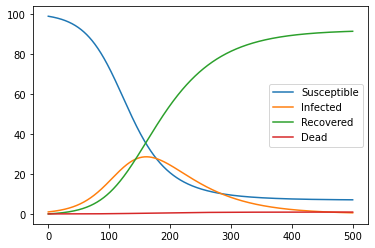

In [41]:
beta = 0.0005
res = simVirusSpreading(beta,True)

Note that the development highly depends on the parameter $\beta$. So, if all behave well, the infection risk drops and the infection spreading slows down. Inversely, if we misbehave and increase the risk of infection, the infection spreads faster. Here simulations with $\beta = 0.03\%$ and $\beta = 0.07\%$, respectively.

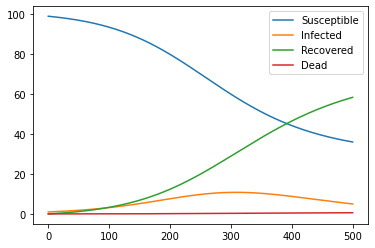

In [42]:
beta = 0.0003
res = simVirusSpreading(beta,True)

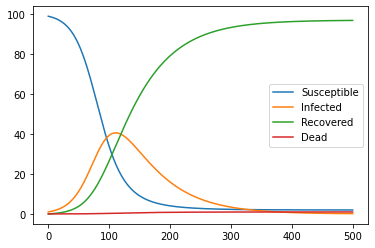

In [43]:
beta = 0.0007
res = simVirusSpreading(beta,True)

Of course, the exact parameters values for $\beta, \mu, \nu$ are not known but can only be approximated from observations. The ODE model is an abstraction of the real process, which depends on deterministic but unknown variables and randomness. Therefore, it makes sense to understand disease spreading as a **random process.**

We will generate some observations from this process from different countries and then forget about the process and only work with the observations.

Therefore, we assume that $\beta$ distributes normally around a mean of $\bar \beta = 0.05\%$ with a standard deviation of $\sigma = 0.01\%$. We generate the data for $50$ countries. However, we are only "observing" $8$ new features.

1. The numbers $N_{50}, N_{150}, N_{300}$ of infected after $50, 150, 300$ days, resp. 
2. The corresponding numbers of new infections on that day $D_{50}, D_{150}, D_{300}$.
3. The time $T_{peak}$ to peak infection.
4. The total number of casulties $X_{500}$ after $500$ days.

In [53]:
from scipy.interpolate import interp1d
import pandas as pd

In [304]:
countries = 50
verbose = False
export_raw_data = True

if verbose:
    countries = 1
if export_raw_data:
    raw_features = np.zeros((4*countries,500))
    raw_features[1,:] = np.arange(0,500)
    
features = np.zeros((countries,8))

np.random.seed(13)
betas = np.random.normal(0.0005,0.0001,size = countries)

for i in range(countries):
    res = simVirusSpreading(betas[i],False)
    times = res[0]
    rand_res = np.zeros((times.shape[0],4))
    rand_res[:,0] = times
    for j in range(1,4):
        rand_res[:,j] = np.random.normal(res[1][:,j],0.025*res[1][:,j])
    if verbose:
        print("Beta = {}%".format(betas[0]*100))
        for k in range(1,4):
            plt.plot(times,
                     res[1][:,k],
                     rand_res[:,k],
                    )
    if export_raw_data:
        days = np.arange(0,500)
        for v in range(1,4):
            F = interp1d(rand_res[:,0],rand_res[:,v])
            raw_features[i*4+v,:] = F(days)
    
    
    for k,tp in enumerate([50,150,300]):
        ti = times[times <= tp].shape[0]
        n_tp = rand_res[ti,1]
        d_tp = rand_res[ti,1] - rand_res[ti-1,1]
        features[i,k] = n_tp
        features[i,k+3] = d_tp
        if verbose:
            print("n_{} = {}  | d_{} = {} | ".format(tp,n_tp,tp,d_tp),end = "")
    if verbose:
        print("t_peak = {} | ".format(t_peak),end = "")
        print("nx_500 = {}".format(rand_res[-1,4]))
    
    t_peak = times[np.argmax(rand_res[:,1])]
    features[i,6] = t_peak
    features[i,7] = rand_res[-1,3]

df_features = pd.DataFrame(features)
df_features.to_csv("2020_DL_data/epidemic_process_aa.csv",sep ="\t")
if export_raw_data:
    df_raw_features = pd.DataFrame(raw_features)
    df_raw_features.to_csv("2020_DL_data/epidemic_process_raw_data_aa.csv'")
    
    

## Load the (generated) data and get an overview

This is your starting point. Load the observation data.

In [305]:
features = pd.read_csv("2020_DL_data/epidemic_process_aa.csv",sep = "\t",header = 0, index_col = 0)
features

Plot the emperical **cumulative probability distributions** (CDFs) of the **random variables** (features).

In [256]:
def cdfplot(x: np.ndarray,
            feature_name: Optional[str] = None,
            figax: Optional[Tuple[plt.Figure,plt.Axes]] = [None,None],
            label: Optional[str] = None,
            set_title: bool = True,
            return_ax: bool = False,
           )->Optional[Tuple[plt.Figure,plt.Axes]]:
    
    if figax[0] is None:
        fig,ax = plt.subplots(1,1,figsize = (10,10))
    else:
        fig,ax = figax
        
    bins,edges = np.histogram(x,bins = x.shape[0])
    diff = edges[1] - edges[0]
    edges += diff
    edges = edges[0:-1]
    e_cdf = np.cumsum(bins)
    e_cdf = e_cdf / e_cdf[-1]
    ax.step(edges,e_cdf,"-",label = label)
    ax.set_ylabel("F(x)")
    ax.set_xlabel("x")
    if set_title:
        title = "Empirical CDF"
        if feature_name is not None:
            title += " of {}".format(feature_name)
        ax.set_title(title,fontsize = 20)
    if return_ax:
        return fig,ax 
    else:
        plt.show()

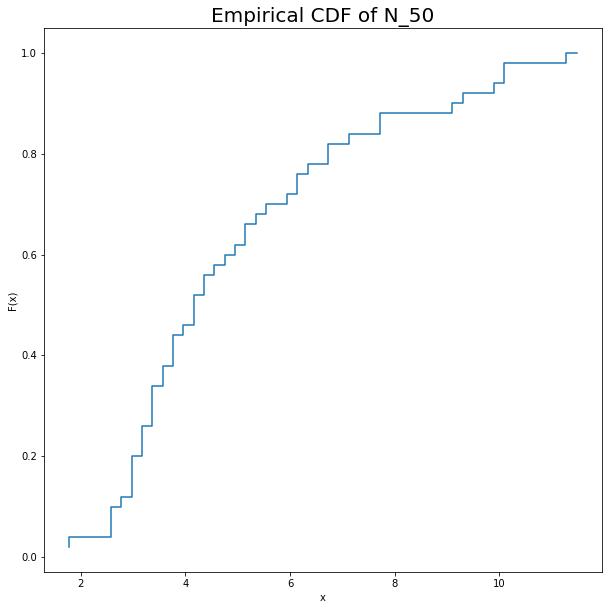

In [257]:
cdfplot(features.values[:,0], "N_50")

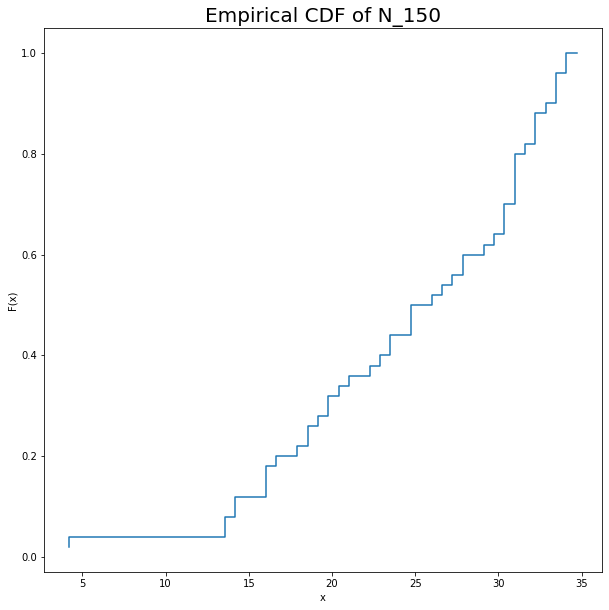

In [171]:
cdfplot(features.values[:,1],feature_name="N_150")

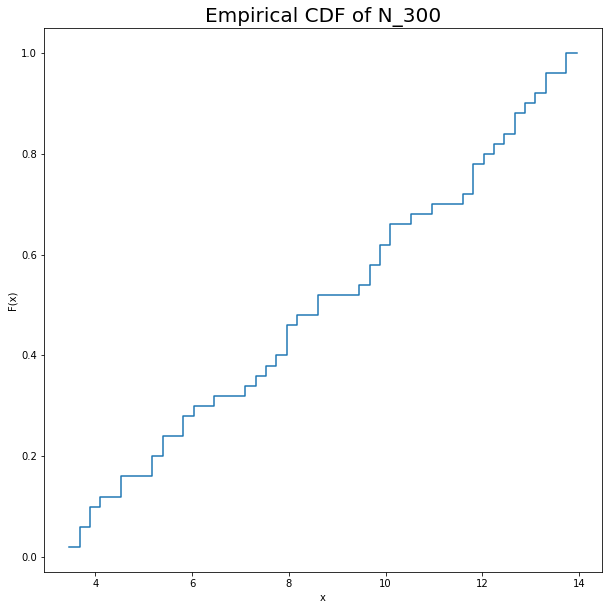

In [172]:
cdfplot(features.values[:,2],"N_300")

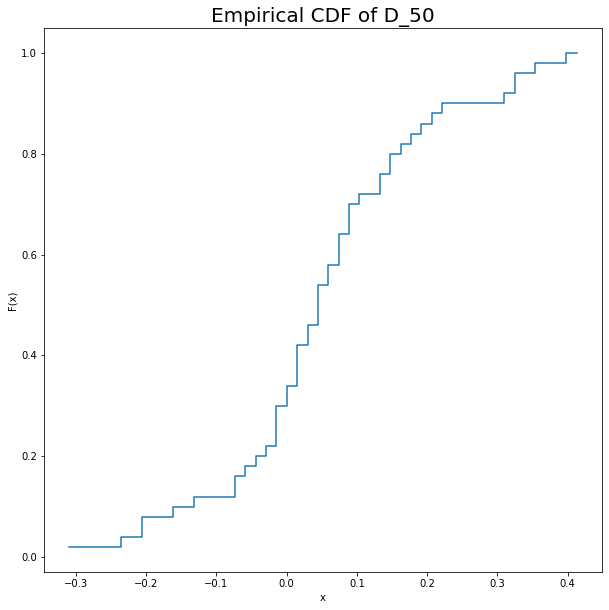

In [173]:
cdfplot(features.values[:,3],"D_50")

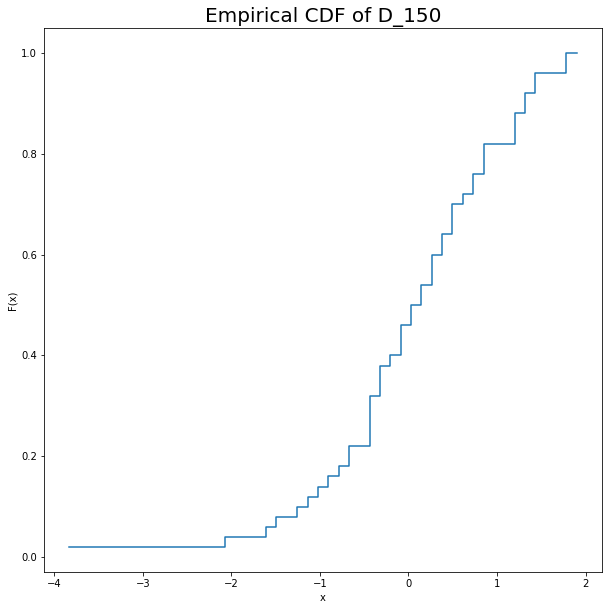

In [175]:
cdfplot(features.values[:,4],"D_150")

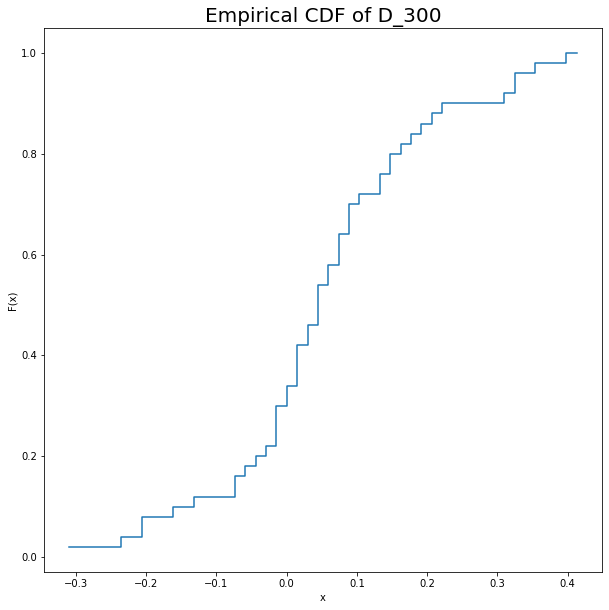

In [176]:
cdfplot(features.values[:,3],"D_300")

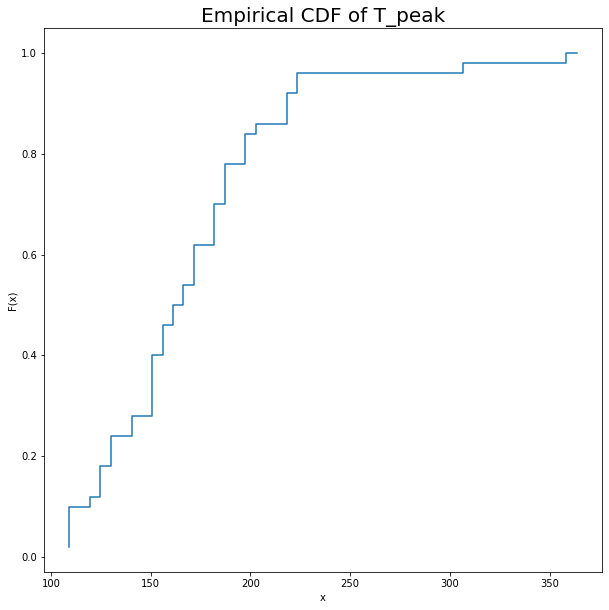

In [182]:
cdfplot(features.values[:,6],"T_peak")

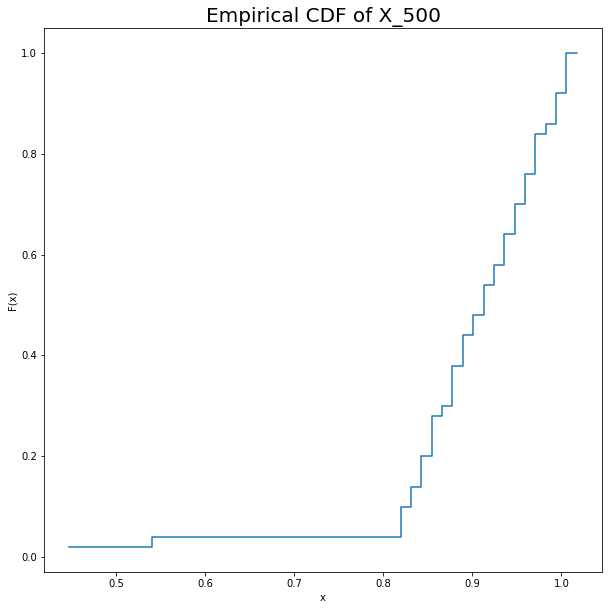

In [178]:
cdfplot(features.values[:,7],"X_500")

Recall, the sample `mean` value is an approximation of the expected value, or **expectation** of the random variable. The sample **variance** is the square of the sample standard deviation `std`.    

Check the correlation between the features.

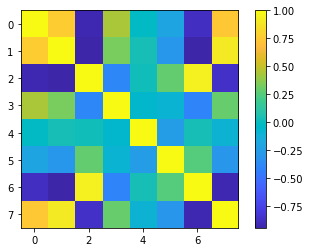

In [428]:
rho = np.corrcoef(features.values.T)
plt.imshow(rho,cmap = parula_map)
plt.colorbar()
plt.show()

Recall, the (sample) correlation of two (samples of) random variables $X$ and $Y$ their (sample) **covariance** normalized (divided) by the product of their (sample) standard deviation.

**Q**: *Discuss your findings. Your answer goes here.*<br>
<br>
**A**: It seems as if the N_50 and N_150 correlate quite strongly, while N_300 seems to anticorrelate strongly with both of these two values, likely because if there are a lot of people infected in the earlier stages a majority of people will be immune or deas at the later stage(N_300) and vice versa, thus explaining the anticorrlation. The number of casualties after 500 days has a strong correlation (positive) with the N_50 and N_150 values, which makes sense as a large proportion of infected people in the beginning will allow more people to die of the disease as time progress. As expected the T_peak anticorrelates with N_50 and N_150; expected since if the proportion of infected people is high early on (high N_50 and N_150 values) the peak time will be small (early peak), while for low N_50 and N_150 values the peak time will be later (high T_peak).

## Try to fit parametric probability distributions

We go through a set of common probability distributions and try to fit any of them  to the data. We use the Chi-square and the Kolmogorov-Smirnov tests to check the goodness of fit. 

*Note that fitting and testing using the same data is actually not quite correct. We should use cross-validation.*

In [220]:
import scipy.stats as st

Comment: I decided to exclude the Poisson distribution as it made no sense to have a distribution that models whole integer counts for a set of continous values, this was instead replaced by the normal distribution. Furthermore, there was no good implementation of the chi2 goodness of fit test in Python, and felt as if this was not an integral part of the lab to implement, hence I restorted to only using the Kolmogorov-Smirnov test.

In [451]:
def distrubition_fitting(x:np.ndarray):
    
    distnames = {"normal":"norm",
                "exponential":"expon",
                 "gamma":"gamma",
                 "extremevalue":"genextreme"
                }
    values_must_be_positive = ["exponential", "gamma"]
    
    
    xmin = x.min()
    xmax = x.max()
    xx = np.linspace(xmin,xmax,1000)
    
    pmax = 0
    pname = ""
    
    for fancy_name,dist_name in distnames.items():
        if (min(x) < 0) and (dist_name in values_must_be_positive):
            continue
        pd = eval("st." + dist_name)
        fitres = pd.fit(x)
        cdf = pd(*fitres).cdf
        _,pval = st.kstest(x,cdf)
        if pval > pmax:
            best_fit = pd(*fitres)
            pmax = pval
            pname = fancy_name
        if pval > 0.05:
            print("Is {} with 5% significance level".format(fancy_name))
        else:
            print("Not {} with 5% significance level".format(fancy_name))
            
    if pmax > 0.05:
        print("Best fit : {}".format(pname))
        fig,ax = plt.subplots(1,1,figsize = (10,10))
        fig,ax = cdfplot(x,
                         figax = (fig,ax),
                             label = "empirical",
                             return_ax=True,
                             set_title = False)
        ax.plot(xx,best_fit.cdf(xx),label = "CDF {}".format(fancy_name))
        ax.legend()
        ax.set_title("Empirical and estimated CDF")
        plt.show()
        
    return best_fit
            
    

Is normal with 5% significance level
Is exponential with 5% significance level
Is gamma with 5% significance level
Is extremevalue with 5% significance level
Best fit : gamma


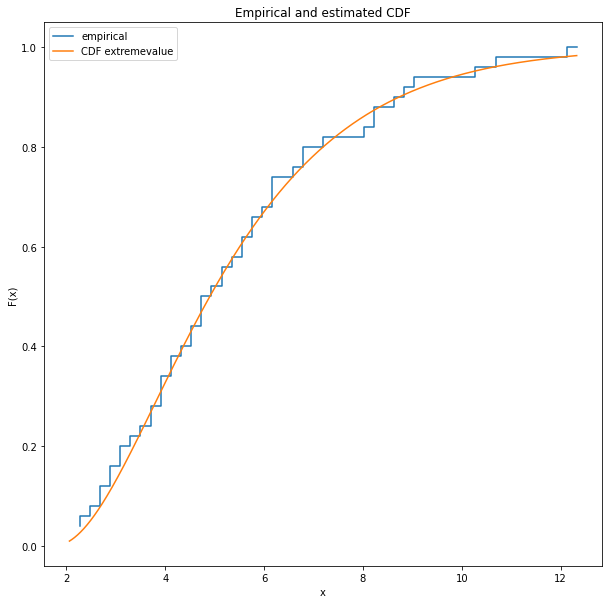

In [452]:
pd_n_50  = distrubition_fitting(features.values[:,0])

Is normal with 5% significance level
Not exponential with 5% significance level
Is gamma with 5% significance level
Is extremevalue with 5% significance level
Best fit : extremevalue


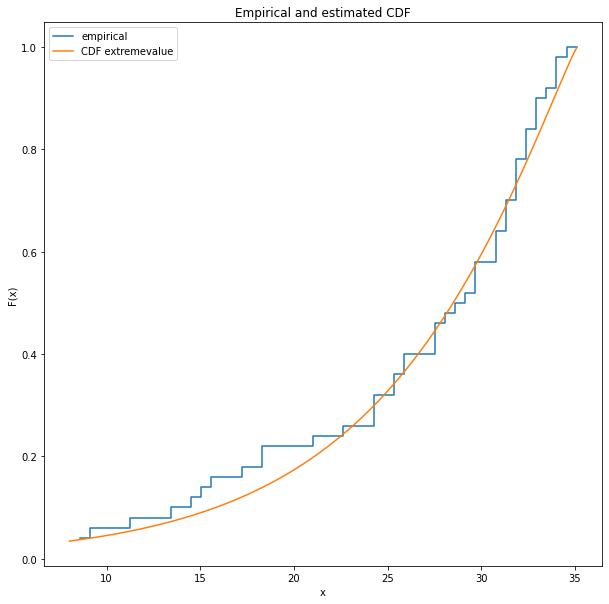

In [453]:
distrubition_fitting(features.values[:,1])

Is normal with 5% significance level
Is exponential with 5% significance level
Is gamma with 5% significance level
Is extremevalue with 5% significance level
Best fit : gamma


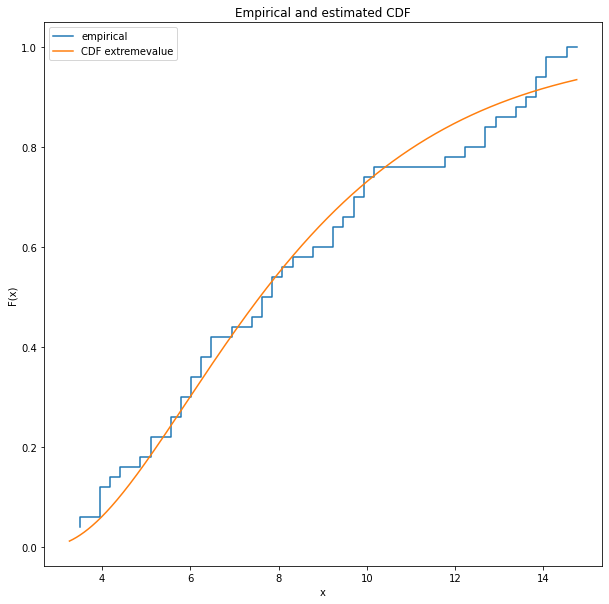

In [454]:
distrubition_fitting(features.values[:,2])

Is normal with 5% significance level
Not exponential with 5% significance level
Is extremevalue with 5% significance level
Best fit : extremevalue


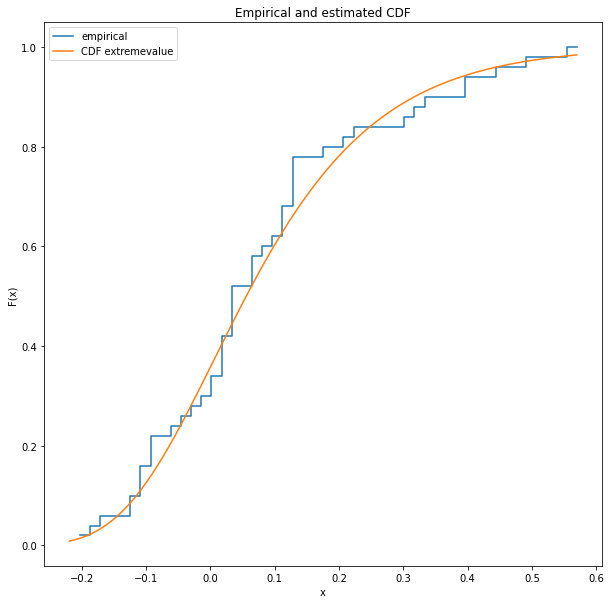

In [455]:
distrubition_fitting(features.values[:,3])

Is normal with 5% significance level
Not exponential with 5% significance level
Is extremevalue with 5% significance level
Best fit : normal


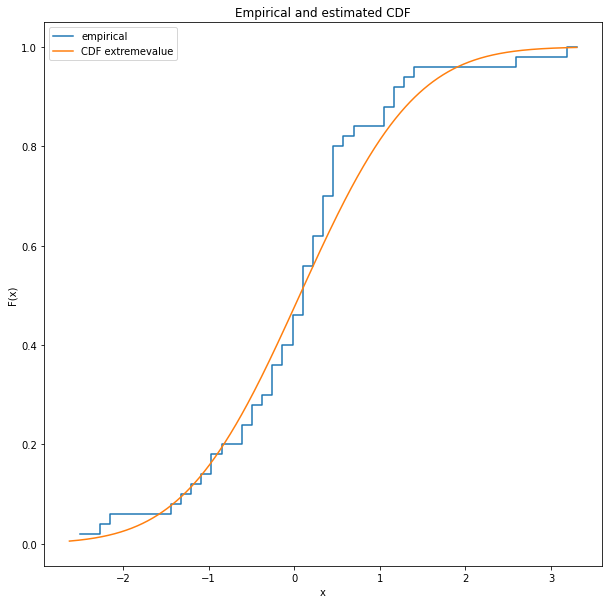

In [456]:
distrubition_fitting(features.values[:,4])

Is normal with 5% significance level
Not exponential with 5% significance level
Is extremevalue with 5% significance level
Best fit : normal


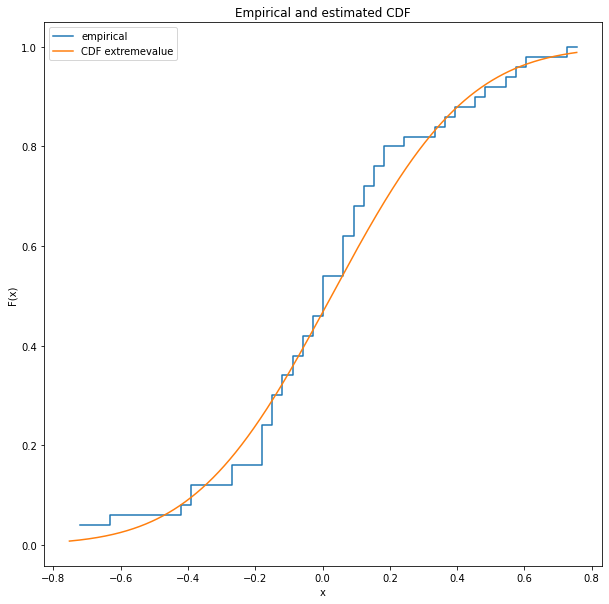

In [457]:
distrubition_fitting(features.values[:,5])

Is normal with 5% significance level
Not exponential with 5% significance level
Is gamma with 5% significance level
Is extremevalue with 5% significance level
Best fit : extremevalue


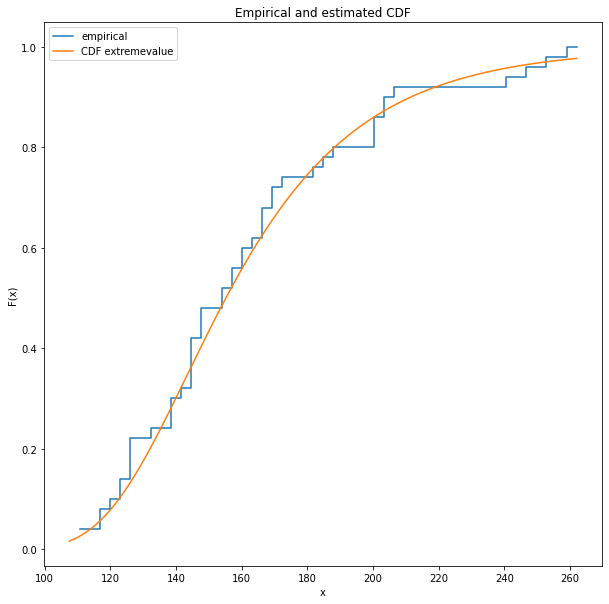

In [458]:
distrubition_fitting(features.values[:,6])

Not normal with 5% significance level
Not exponential with 5% significance level
Not gamma with 5% significance level
Is extremevalue with 5% significance level
Best fit : extremevalue


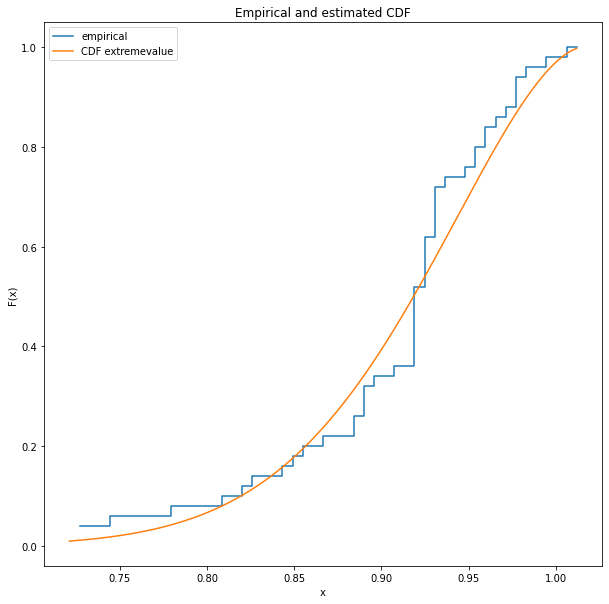

In [459]:
pd_x_500 = distrubition_fitting(features.values[:,7])

**Q** : *Describe the fitted distributions. Your answer goes here.*
<br>
<br>
**A**: In most of the cases the fitted disributions were best approximated with an extremevalue distribution, but the normal distribution and gamma distribution were selected as the best fit in some of the cases. The extreme value distribution is used to model the minimum or the maximum of a collection of data. The gamma distribution is used to model continous positive variables, where the distributions tend to be skewed. Just like the Poisson distribution (to which the gamma is a conjugate prior) the Gamma distribution is often used when modeling queuing events or waiting times. The normal distribution, being perhaps the most well-known distribution, models the spread of observations around a central value.


## Joint  and conditional probabilities, chain rule and Bayes' Theorem

Lets calculate the probability of having a mild start and a disastrous end of the epidemia. We translate that to the **joint probability** that no more than $4\%$ are infected after $50$ days, i.e., $N_{50}\leq 4\%$ and more than $0.90\%$ die in the end, i.e., $X_{500}>0.90\%$.<br>
<br>
Comment : I changed the $X_{500}$ threshold value from 0.95 to 0.90, I noticed how only one observation (indicating a rare event) was present in the example data set and when generating samples from my implementation there were no observations present. Since this seemed like a fairly arbitrary cutoff used for the purpose of separating countries into disastrous or non-disastrous outcome groups, it felt ok to modify this value for the purpose of continuing with the exercise. 

In [314]:
n_50 = features.values[:,0]
x_500 = features.values[:,7]
positive_cases = np.sum((n_50 <= 4) * (x_500 > 0.90))
all_cases = features.shape[0]
P = positive_cases / all_cases
P

0.06

So $P(N_{50}\leq 4\%, X_{500}>0.90\%) \approx 0.06$.

We check the product of the two probabilities $P(N_{50}\leq 4\%)P(X_{500}>0.90\%)$:

In [317]:
P2 = sum(n_50 <= 4) * sum(x_500 > 0.9) / all_cases**2
P2

0.198

We are not surprised that the result is different from the joint probability as the random variables $N_{50}$ and $X_{500}$ not independent (double-check the results from the correlation analysis).  

What is the **conditional probability** of more than $0.90\%$ die in the end given that we know that no more $4\%$ are infected after $50$ days.

In [319]:
mild_start_cases = sum(n_50 <= 4)
P_AB = positive_cases / mild_start_cases
P_AB

0.2

So $P(X_{500}>0.90\%|N_{50}\leq 4\%) \approx 0.2$.

The product or **chain rule** of probability states that

\begin{align}
P(A,B) &= P(A|B)P(B)\\
P(X_{500}>0.90\%,N_{50}\leq 4\%) &= P(X_{500}>0.90\%|N_{50}\leq 4\%)P(N_{50}\leq 4\%)
\end{align}

And we don't get disappointed:

In [321]:
P_B = mild_start_cases/all_cases
P = P_AB*P_B
P

0.06

Let us numerically confirm **Bayes' Theorem** for this case. We'd expect that  

\begin{align}
P(A|B) &= \frac{P(B|A)P(A)}{P(B)}\\
P(X_{500}>0.90\%|N_{50}\leq 4\%) &= \frac{P(N_{50}\leq 4\%|X_{500}>0.90\%)P(X_{500}>0.90\%)}{P(N_{50}\leq 4\%)}
\end{align}

And we don't get disappointed:

In [323]:
disaster_cases = sum(x_500 > 0.9)
P_A = disaster_cases / all_cases
P_BA = positive_cases / disaster_cases
P_AB = P_BA*P_A / P_B
P_AB

0.2

So far, we have looked at the joint (sample) probability of $P(N_{50}\leq n, X_{500}>x)$ for *concrete* bounds $n=4$ and $x=0.90$. Let us now understand the joint (sample) probability of $F(n,x)=P(N_{50}\leq n, X_{500}>x)$ as a *function* of these bounds $n$ and $x$. Since, $0\leq X_{500}\leq 1$ this function is equal to joint (sample) cumulative distribution function: 

\begin{align}
F(n,x) &=\mathit{CDF}_{N_{50},1-X_{500}}(n,1-x)\\
\mathit{CDF}_{N_{50},100-X_{500}}(n,y)&=P(N_{50}\leq n, 1-X_{500}\leq y)
\end{align}
<br>
<br>
comment: Changed from 100 to 1

In [363]:
def ecdfbiv(xvals,yvals,bins_side = 20):
    H, xedges, yedges = np.histogram2d(xvals,yvals,bins = bins_side)
    xx,yy = np.meshgrid(xedges,yedges)
    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    biv_pdf = H / xvals.shape[0] / (dx*dy)
    biv_cdf = np.zeros(xx.shape)
    
    for i,xp in enumerate(xedges):
        for j,yp in enumerate(yedges):
            s1 = np.sum(H[0:i,0:j])
            biv_cdf[i,j] = s1/xvals.shape[0]
    return xx,yy,biv_cdf

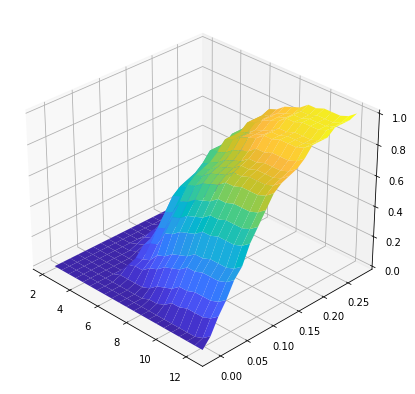

In [463]:
X,Y,Z = ecdfbiv(n_50,1-x_500)
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z,
                       rstride=1,
                       cstride=1,
                       cmap=parula_map,
                       edgecolor='none')

ax.view_init(None, -45)
plt.show()

**Q**: *Interpret this CDF. Your answer goes here.*<br>
<br>
**A**: I'm not really sure what interpretation that is sought here, but would say that this CDF seems to indicate (due to the fairly steep incline up-until $N_50 > 4$ and $X_500 >= 0.85$ on both) that a large proportion of the events happen within this region ($N_{50} > 4$ and $X_{500} >= 0.85$), but looking at the flatness of the top, not a lot of extreme events happens.

Finally, we compare the emperical PDF the (sample) distribution with the fitted PDF of that distribution. We look at $N_{50}$.

In [405]:
def samplePDF(sample,pd_fit,verbose):
    kdefit = st.gaussian_kde(sample)
    xx = np.linspace(sample.min(),sample.max(),1000)
    pdf_kde = kdefit(xx)
    pdf_par = pd_fit.pdf(xx)
    if verbose:
        plt.plot(xx,pdf_kde,label = "empirical")
        plt.plot(xx,pdf_par,label = "parametric")
        plt.legend()
        plt.show()
    return kdefit

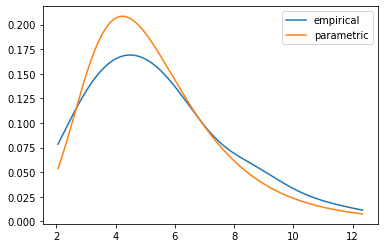

In [406]:
PDF_n_50 = samplePDF(n_50,pd_n_50,True)

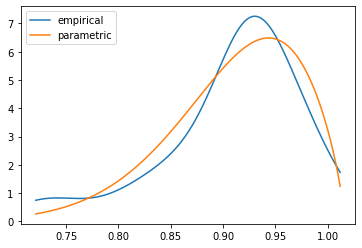

In [407]:
PDF_x_500 = samplePDF(x_500,pd_x_500,True)

## Self-entropy of an event and entropy of a distribution

We define a function that calculates the entropy of a sample distribution, based on a parameterless sample PDF approximation (calculated with `samplePDF`) and a well-known ditribition with fitted parameters (calculated with `distribution_fitting`). It also computeas the Kullback-Leibler (KL) divergence in both directions.

In [420]:
def fit_sample_entropies(sample,pd_fit,PDF):
    EntropyFitted = 0
    EntropySample = 0
    diff_fit_sample = 0
    diff_sample_fit = 0
    
    def entropy(x):
        xx = x.copy()
        xx[xx == 0] = np.nan
        Ei = np.log(xx)*xx
        Ei[np.isnan(Ei)] = 0
        E = -np.sum(Ei)
        return E
    
    def kld(p,q):
        pp = p.copy()
        pp[pp == 0] = np.nan
        assert all(q > 0),\
            "q can't be zero"
        kld_arr = pp*np.log(pp/q)
        kld_arr[np.isnan(kld_arr)] = 0
        return kld_arr.sum()
    
    pdf_fitted = pd_fit.pdf(sample)
    EntropyFitted =  st.entropy(pdf_fitted)
    pdf_sample = PDF(sample)
    EntropySample = st.entropy(pdf_sample)
    diff_fit_sample = st.entropy(pdf_fitted,pdf_sample)
    diff_sample_fit = st.entropy(pdf_sample,pdf_fitted)
    return (EntropyFitted,EntropySample,diff_fit_sample,diff_sample_fit)

Let's apply this function on the $N_{50}$ sample.

In [421]:
EntropyFitted, EntropySample, diff_fit_sample, diff_sample_fit = fit_sample_entropies(n_50, pd_n_50, PDF_n_50)
print(EntropyFitted, EntropySample, diff_fit_sample, diff_sample_fit)

3.7867890746035973 3.833483855790049 0.008893935940509605 0.009612418830157326


**Q**: *Why is the entropy of $N_{50}$ assuming is proportional to the sample PDF higher that assuming it is proportional to the fitted Gamma distribution? Why are the divergence values different? Your answers go here.* <br>
<br>
**A**: The entropy of $N_{50}$ is higher for the sample-based pdf is higher because of the presene of sampling noise in our data, which increases the variance of the distribution, making it less concentrated and hence having a higher entropy. The divergence values are different since the KLD is non-symmetric. We see that in the formula : $KLD(P||Q) = \sum_{x\in X} P(x)\log(\frac{P(X)}{Q(x)}) $ the order of $P$ and $Q$ as arguments matters. This also resonates with the interpretation of KLD being the cost of _decoding_ samples from $P$ using a scheme optimized for $Q$.

## References

1. Amira Rachah and Delfim F. M. Torres: Mathematical Modelling, Simulation, and Optimal Control of the 2014 Ebola Outbreak in West Africa. Discrete Dynamics in Nature and Society, Volume 2015, Article ID 842792, https://www.hindawi.com/journals/ddns/2015/842792/.